---
### Question 1: [Index] S&P 500 Stocks Added to the Index

**Which year had the highest number of additions?**

Using the list of S&P 500 companies from Wikipedia's [S&P 500 companies page](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies), download the data including the year each company was added to the index.

Hint: you can use [pandas.read_html](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) to scrape the data into a DataFrame.

Steps:
1. Create a DataFrame with company tickers, names, and the year they were added.
2. Extract the year from the addition date and calculate the number of stocks added each year.
3. Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

*Context*: 
> "Following the announcement, all four new entrants saw their stock prices rise in extended trading on Friday" - recent examples of S&P 500 additions include DASH, WSM, EXE, TKO in 2025 ([Nasdaq article](https://www.nasdaq.com/articles/sp-500-reshuffle-dash-tko-expe-wsm-join-worth-buying)).

*Additional*: How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

---

In [1]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

import warnings
warnings.filterwarnings('ignore')



In [2]:
# ! pip install lxml

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)

In [4]:
type(tables), len(tables)

(list, 2)

In [5]:
tickers = tables[0]

In [6]:
tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [7]:
tickers.dtypes

Symbol                   object
Security                 object
GICS Sector              object
GICS Sub-Industry        object
Headquarters Location    object
Date added               object
CIK                       int64
Founded                  object
dtype: object

In [8]:
tickers["Date added"]

0      1957-03-04
1      2017-07-26
2      1957-03-04
3      2012-12-31
4      2011-07-06
          ...    
498    2011-11-01
499    1997-10-06
500    2019-12-23
501    2001-08-07
502    2013-06-21
Name: Date added, Length: 503, dtype: object

In [9]:
tickers.columns = tickers.columns.str.lower().str.replace(' ', '_')

In [10]:
tickers.head()

,symbol,security,gics_sector,gics_sub-industry,headquarters_location,date_added,cik,founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [11]:
tickers['date_added'] = pd.to_datetime(tickers['date_added'])

In [12]:
tickers.head()

,symbol,security,gics_sector,gics_sub-industry,headquarters_location,date_added,cik,founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [13]:
tickers.dtypes

symbol                           object
security                         object
gics_sector                      object
gics_sub-industry                object
headquarters_location            object
date_added               datetime64[ns]
cik                               int64
founded                          object
dtype: object

In [14]:
tickers['year'] = tickers['date_added'].dt.year


In [15]:
tickers.head()

,symbol,security,gics_sector,gics_sub-industry,headquarters_location,date_added,cik,founded,year
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,1957
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,2017
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1957
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2012
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,2011


In [16]:
import datetime

tickers['age'] = datetime.datetime.now().year - tickers['date_added'].dt.year


In [17]:
tickers.head()

,symbol,security,gics_sector,gics_sub-industry,headquarters_location,date_added,cik,founded,year,age
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,1957,68
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,2017,8
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1957,68
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2012,13
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,2011,14


In [18]:
tickers['year'].value_counts().sort_values(ascending=False).head(5)

year
1957    53
2017    23
2016    23
2019    22
2008    17
Name: count, dtype: int64

In [19]:
tickers[tickers.age > 20].sort_values(ascending=False, by="age")

,symbol,security,gics_sector,gics_sub-industry,headquarters_location,date_added,cik,founded,year,age
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,1957,68
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1957,68
25,AEP,American Electric Power,Utilities,Electric Utilities,"Columbus, Ohio",1957-03-04,4904,1906,1957,68
21,MO,Altria,Consumer Staples,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985,1957,68
43,ADM,Archer Daniels Midland,Consumer Staples,Agricultural Products & Services,"Chicago, Illinois",1957-03-04,7084,1902,1957,68
...,...,...,...,...,...,...,...,...,...,...
281,LH,Labcorp,Health Care,Health Care Services,"Burlington, North Carolina",2004-11-01,920148,1978,2004,21
297,MTB,M&T Bank,Financials,Regional Banks,"Buffalo, New York",2004-02-23,36270,1856,2004,21
434,TPR,"Tapestry, Inc.",Consumer Discretionary,"Apparel, Accessories & Luxury Goods","New York City, New York",2004-09-01,1116132,2017,2004,21
444,TMO,Thermo Fisher Scientific,Health Care,Life Sciences Tools & Services,"Waltham, Massachusetts",2004-08-03,97745,2006 (1902),2004,21


In [20]:
tickers[tickers.age > 20].shape[0]

219

## Question 1

* Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

* Additional: How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

## Answer 1


* 2017
* Additional = 219

---
### Question 2. [Macro] Indexes YTD (as of 1 May 2025)

**How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?**

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:
* United States - S&P 500 (^GSPC)
* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)	
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

*Hint*: use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Context: 
> [Global Valuations: Who's Cheap, Who's Not?](https://simplywall.st/article/beyond-the-us-global-markets-after-yet-another-tariff-update) article suggests "Other regions may be growing faster than the US and you need to diversify."

Reference: Yahoo Finance World Indices - https://finance.yahoo.com/world-indices/

*Additional*: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend?
Note: For simplicity, ignore currency conversion effects.)

---

In [21]:
index_ticker = "^GSPC"
data = yf.download(index_ticker, start='2025-01-01', end='2025-05-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [22]:
data

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2025-01-02,5868.549805,5935.089844,5829.529785,5903.259766,3621680000
2025-01-03,5942.470215,5949.339844,5888.660156,5891.069824,3667340000
2025-01-06,5975.379883,6021.040039,5960.009766,5982.810059,4940120000
2025-01-07,5909.029785,6000.680176,5890.680176,5993.259766,4517330000
2025-01-08,5918.250000,5927.890137,5874.779785,5910.660156,4441740000
...,...,...,...,...,...
2025-04-24,5484.770020,5489.399902,5371.959961,5381.379883,4697710000
2025-04-25,5525.209961,5528.109863,5455.859863,5489.729980,4236580000


In [23]:
import yfinance as yf
import pandas as pd

def calcular_ytd(ticker, start_date='2025-01-01', end_date='2025-05-01'):
    # Descargar datos diarios del índice
    df = yf.download(ticker, start=start_date, end=end_date)

    # Asegurar que hay datos
    if df.empty:
        print(f"No data found for {ticker}")
        return None

    # Obtener primer día hábil igual o posterior al start_date
    start_close = df.loc[df.index >= start_date].iloc[0]['Close']

    # Obtener último día hábil igual o anterior al end_date
    end_close = df.loc[df.index <= end_date].iloc[-1]['Close']

    # Asegurar que ambos valores son floats
    start_close = float(start_close)
    end_close = float(end_close)

    # Calcular retorno YTD en porcentaje
    ytd_return = (end_close / start_close - 1) * 100

    return ytd_return

# Ejemplo
ticker = '^GSPC'
ytd = calcular_ytd(ticker)
if ytd is not None:
    print(f"YTD return for {ticker}: {ytd:.2f}%")


[*********************100%***********************]  1 of 1 completed

YTD return for ^GSPC: -5.10%


In [24]:
import yfinance as yf
import pandas as pd

# Lista de índices y sus tickers
indices = {
    'United States - S&P 500': '^GSPC',
    'China - Shanghai Composite': '000001.SS',
    'Hong Kong - HANG SENG': '^HSI',
    'Australia - ASX 200': '^AXJO',
    'India - Nifty 50': '^NSEI',
    'Canada - TSX Composite': '^GSPTSE',
    'Germany - DAX': '^GDAXI',
    'United Kingdom - FTSE 100': '^FTSE',
    'Japan - Nikkei 225': '^N225',
    'Mexico - IPC': '^MXX',
    'Brazil - Ibovespa': '^BVSP'
}

# Fechas de análisis
start_date = '2025-01-01'
end_date = '2025-05-01'

# Función para calcular rendimiento YTD y fechas efectivas
def calcular_ytd(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)

    if df.empty:
        print(f"No data found for {ticker}")
        return None, None, None

    try:
        start_row = df.loc[df.index >= start_date]
        end_row = df.loc[df.index <= end_date]

        start_close = float(start_row['Close'].iloc[0])
        end_close = float(end_row['Close'].iloc[-1])

        start_actual = start_row.index[0].date()
        end_actual = end_row.index[-1].date()

        ytd_return = (end_close / start_close - 1) * 100

        return ytd_return, start_actual, end_actual
    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        return None, None, None

# Calcular S&P 500 por separado
sp500_key = 'United States - S&P 500'
sp500_ticker = indices[sp500_key]
sp500_ytd, sp500_start, sp500_end = calcular_ytd(sp500_ticker, start_date, end_date)

print(f"\n{sp500_key} YTD return: {sp500_ytd:.2f}% "
      f"(from {sp500_start} to {sp500_end})\n")

# Eliminar S&P 500 del diccionario para comparar los demás
del indices[sp500_key]

# Calcular rendimientos de los otros índices
rendimientos = {}
fechas = {}

for nombre, ticker in indices.items():
    ytd, f_inicio, f_fin = calcular_ytd(ticker, start_date, end_date)
    if ytd is not None:
        rendimientos[nombre] = ytd
        fechas[nombre] = (f_inicio, f_fin)

# Comparar y mostrar
mejores = 0
for nombre, ytd in rendimientos.items():
    mejor = ytd > sp500_ytd
    status = "↑ better" if mejor else "↓ worse"
    fechas_inicio, fechas_fin = fechas[nombre]
    print(f"{nombre}: {ytd:.2f}% ({status}) "
          f"[{fechas_inicio} → {fechas_fin}]")
    if mejor:
        mejores += 1

print(f"\nÍndices con mejor rendimiento YTD que el S&P 500: {mejores} de {len(rendimientos)}")



United States - S&P 500 YTD return: -5.10% (from 2025-01-02 to 2025-04-30)

China - Shanghai Composite: 0.50% (↑ better) [2025-01-02 → 2025-04-30]
Hong Kong - HANG SENG: 12.72% (↑ better) [2025-01-02 → 2025-04-30]
Australia - ASX 200: -0.91% (↑ better) [2025-01-02 → 2025-04-30]
India - Nifty 50: 2.49% (↑ better) [2025-01-01 → 2025-04-30]
Canada - TSX Composite: -0.23% (↑ better) [2025-01-02 → 2025-04-30]
Germany - DAX: 12.35% (↑ better) [2025-01-02 → 2025-04-30]
United Kingdom - FTSE 100: 2.84% (↑ better) [2025-01-02 → 2025-04-30]
Japan - Nikkei 225: -8.30% (↓ worse) [2025-01-06 → 2025-04-30]
Mexico - IPC: 13.05% (↑ better) [2025-01-02 → 2025-04-30]
Brazil - Ibovespa: 12.44% (↑ better) [2025-01-02 → 2025-04-30]

Índices con mejor rendimiento YTD que el S&P 500: 9 de 10


In [25]:
import yfinance as yf
import pandas as pd

# Lista de índices
indices = {
    'United States - S&P 500': '^GSPC',
    'China - Shanghai Composite': '000001.SS',
    'Hong Kong - HANG SENG': '^HSI',
    'Australia - ASX 200': '^AXJO',
    'India - Nifty 50': '^NSEI',
    'Canada - TSX Composite': '^GSPTSE',
    'Germany - DAX': '^GDAXI',
    'United Kingdom - FTSE 100': '^FTSE',
    'Japan - Nikkei 225': '^N225',
    'Mexico - IPC': '^MXX',
    'Brazil - Ibovespa': '^BVSP'
}

# Ventanas de análisis
horizontes = {
    'YTD':  ('2025-01-01', '2025-05-01'),
    '3Y':   ('2022-05-01', '2025-05-01'),
    '5Y':   ('2020-05-01', '2025-05-01'),
    '10Y':  ('2015-05-01', '2025-05-01')
}

# Función para calcular retorno
def calcular_retorno(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if df.empty:
        return None
    try:
        start_close = float(df.loc[df.index >= start_date, 'Close'].iloc[0])
        end_close = float(df.loc[df.index <= end_date, 'Close'].iloc[-1])
        return (end_close / start_close - 1) * 100
    except:
        return None

# Calcular rendimientos
data = []
sp500_returns = {}

for nombre, ticker in indices.items():
    fila = {'Index': nombre}
    for h, (start, end) in horizontes.items():
        r = calcular_retorno(ticker, start, end)
        fila[h] = r
        if nombre == 'United States - S&P 500':
            sp500_returns[h] = r
    data.append(fila)

df = pd.DataFrame(data)
df.set_index('Index', inplace=True)

# Comparaciones con el S&P 500
for h in horizontes.keys():
    df[f'>{h}_S&P500'] = df[h] > sp500_returns[h]

# Conteo de cuántos índices superan al S&P 500 por periodo
mejores = {
    h: df[f'>{h}_S&P500'].sum()
    for h in horizontes.keys()
}

print("\nResumen de rendimientos (%):")
display(df)

print("\nCantidad de índices que superan al S&P 500 por periodo:")
for h, count in mejores.items():
    print(f"{h}: {count} de {len(df)}")



Resumen de rendimientos (%):


,YTD,3Y,5Y,10Y,>YTD_S&P500,>3Y_S&P500,>5Y_S&P500,>10Y_S&P500
Index,,,,,,,,
United States - S&P 500,-5.103301,34.020480,96.737219,164.150565,False,False,False,False
China - Shanghai Composite,0.504817,6.886816,13.928827,-26.814921,True,False,False,False
Hong Kong - HANG SENG,12.720018,4.821935,-6.328463,-21.349909,True,False,False,False
Australia - ASX 200,-0.914500,10.605692,54.905743,39.759912,True,False,False,False
India - Nifty 50,2.490424,42.562875,161.841063,192.058866,True,True,True,True
Canada - TSX Composite,-0.226126,20.053451,69.912379,61.942786,True,False,False,False
Germany - DAX,12.346378,61.395129,114.936570,93.608190,True,True,True,False
United Kingdom - FTSE 100,2.842590,12.347091,47.401576,21.598918,True,False,False,False
Japan - Nikkei 225,-8.297931,34.404756,83.723618,84.548741,False,True,False,False



Cantidad de índices que superan al S&P 500 por periodo:
YTD: 9 de 11
3Y: 3 de 11
5Y: 2 de 11
10Y: 1 de 11


## Question 2. [Macro] Indexes YTD (as of 1 May 2025)

**How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?**

## Answer 2


* 9
* Additional
    - 3Y: 3
    - 5Y: 2
    - 10Y: 1

---
### Question 3. [Index] S&P 500 Market Corrections Analysis


**Calculate the median duration (in days) of significant market corrections in the S&P 500 index.**

For this task, define a correction as an event when a stock index goes down by **more than 5%** from the closest all-time high maximum.

Steps:
1. Download S&P 500 historical data (1950-present) using yfinance
2. Identify all-time high points (where price exceeds all previous prices)
3. For each pair of consecutive all-time highs, find the minimum price in between
4. Calculate drawdown percentages: (high - low) / high × 100
5. Filter for corrections with at least 5% drawdown
6. Calculate the duration in days for each correction period
7. Determine the 25th, 50th (median), and 75th percentiles for correction durations

*Context:* 
> * Investors often wonder about the typical length of market corrections when deciding "when to buy the dip" ([Reddit discussion](https://www.reddit.com/r/investing/comments/1jrqnte/when_are_you_buying_the_dip/?rdt=64135)).

> * [A Wealth of Common Sense - How Often Should You Expect a Stock Market Correction?](https://awealthofcommonsense.com/2022/01/how-often-should-you-expect-a-stock-market-correction/)

*Hint (use this data to compare with your results)*: Here is the list of top 10 largest corrections by drawdown:
* 2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
* 2000-03-24 to 2002-10-09: 49.1% drawdown over 929 days
* 1973-01-11 to 1974-10-03: 48.2% drawdown over 630 days
* 1968-11-29 to 1970-05-26: 36.1% drawdown over 543 days
* 2020-02-19 to 2020-03-23: 33.9% drawdown over 33 days
* 1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
* 1961-12-12 to 1962-06-26: 28.0% drawdown over 196 days
* 1980-11-28 to 1982-08-12: 27.1% drawdown over 622 days
* 2022-01-03 to 2022-10-12: 25.4% drawdown over 282 days
* 1966-02-09 to 1966-10-07: 22.2% drawdown over 240 days

---

In [26]:
import yfinance as yf
import pandas as pd

In [27]:
sp500 = yf.download('^GSPC', start='1950-01-01')

[*********************100%***********************]  1 of 1 completed


In [28]:
sp500.head(2)

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,1890000


In [29]:
sp500.dtypes

Price   Ticker
Close   ^GSPC     float64
High    ^GSPC     float64
Low     ^GSPC     float64
Open    ^GSPC     float64
Volume  ^GSPC       int64
dtype: object

In [30]:
sp500.columns = sp500.columns.droplevel(1)  # Esto aplana el índice quitando el segundo nivel (el primero es cero)

In [31]:
sp500.head(2)

Price,Close,High,Low,Open,Volume
Date,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,1890000


In [32]:
sp500.dtypes

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

### 🔍 Nota: Sobre el uso de `cummax()` y columnas con índice multinivel

Al descargar datos desde `yfinance`, es posible que el DataFrame tenga columnas con un índice jerárquico (MultiIndex), especialmente si se descargan múltiples tickers o se conserva información agrupada por tipo.

En ese caso, columnas como `'Close'` no pueden ser accedidas directamente con `sp500['Close']`, ya que su verdadero nombre es una **tupla**, por ejemplo `('Close', '^GSPC')`.


In [33]:
# Paso 2: Identificar máximos históricos
sp500['AllTimeHigh'] = sp500['Close'].cummax()
sp500['IsAllTimeHigh'] = sp500['Close'] == sp500['AllTimeHigh']

In [34]:
sp500

Price,Close,High,Low,Open,Volume,AllTimeHigh,IsAllTimeHigh
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.660000,True
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.850000,True
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.930000,True
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.980000,True
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.080000,True
...,...,...,...,...,...,...,...
2025-05-27,5921.540039,5924.330078,5854.069824,5854.069824,5366380000,6144.149902,False
2025-05-28,5888.549805,5939.919922,5881.879883,5925.540039,4665050000,6144.149902,False
2025-05-29,5912.169922,5943.129883,5873.799805,5939.959961,4569750000,6144.149902,False


In [35]:
# Mostrar solo las filas donde se alcanza un nuevo máximo histórico
sp500[sp500['IsAllTimeHigh']].sort_values('Date', ascending=False)

Price,Close,High,Low,Open,Volume,AllTimeHigh,IsAllTimeHigh
Date,,,,,,,
2025-02-19,6144.149902,6147.430176,6111.149902,6117.759766,4562330000,6144.149902,True
2025-02-18,6129.580078,6129.629883,6099.509766,6121.600098,4684980000,6129.580078,True
2025-01-23,6118.709961,6118.729980,6074.669922,6076.319824,4432250000,6118.709961,True
2024-12-06,6090.270020,6099.970215,6079.979980,6081.379883,3924830000,6090.270020,True
2024-12-04,6086.490234,6089.839844,6061.060059,6069.390137,4003390000,6086.490234,True
...,...,...,...,...,...,...,...
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.080000,True
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.980000,True
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.930000,True


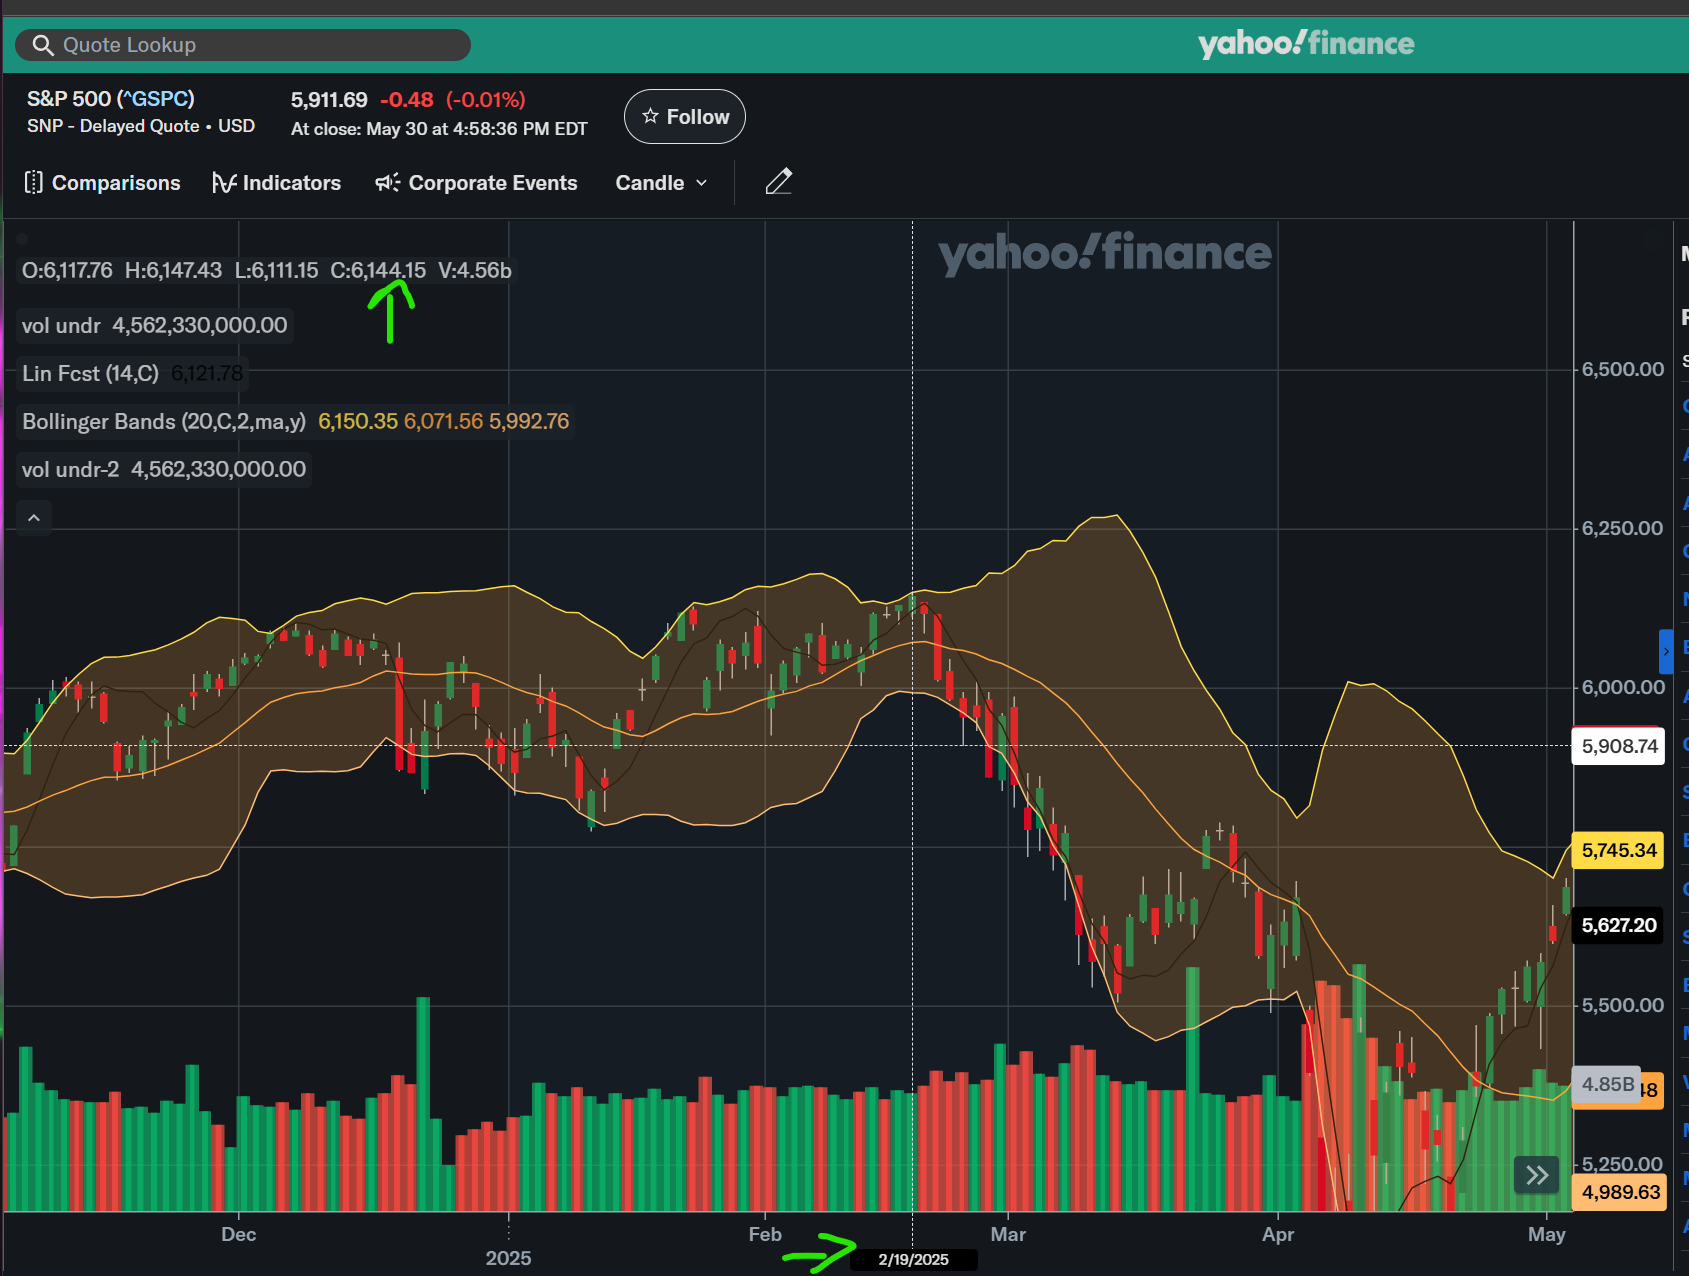

In [36]:
sp500

Price,Close,High,Low,Open,Volume,AllTimeHigh,IsAllTimeHigh
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.660000,True
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.850000,True
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.930000,True
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.980000,True
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.080000,True
...,...,...,...,...,...,...,...
2025-05-27,5921.540039,5924.330078,5854.069824,5854.069824,5366380000,6144.149902,False
2025-05-28,5888.549805,5939.919922,5881.879883,5925.540039,4665050000,6144.149902,False
2025-05-29,5912.169922,5943.129883,5873.799805,5939.959961,4569750000,6144.149902,False


In [37]:
# Obtener las fechas de todos los ATHs (aunque estén seguidos)
ath_dates = sp500[sp500['IsAllTimeHigh']].index.to_list()

In [38]:
ath_dates[:3], len(ath_dates)

([Timestamp('1950-01-03 00:00:00'),
  Timestamp('1950-01-04 00:00:00'),
  Timestamp('1950-01-05 00:00:00')],
 1474)

In [39]:
# Lista para almacenar resultados
corrections = []

# Recorremos cada par consecutivo de ATHs
for i in range(len(ath_dates) - 1):
    start = ath_dates[i]
    end = ath_dates[i + 1]

    # Subset del tramo entre ambos ATHs
    window = sp500.loc[start:end]

    # Si el rango es muy corto o vacío, lo ignoramos
    if window.empty or len(window) < 3:
        continue

    # Encontrar el mínimo dentro del intervalo
    min_idx = window['Close'].idxmin()

    # Si el mínimo está en los extremos (start o end), lo ignoramos
    if min_idx == start or min_idx == end:
        continue

    # Calcular valores
    min_price = window.loc[min_idx, 'Close']
    start_price = sp500.loc[start, 'Close']
    drawdown_pct = (start_price - min_price) / start_price * 100

    # Guardar resultado
    corrections.append({
        'StartDate': start,
        'EndDate': end,
        'MinDate': min_idx,
        'ATH_Close': start_price,
        'Min_Close': min_price,
        'DrawdownPct': drawdown_pct
    })

# Convertimos a DataFrame
corrections_df = pd.DataFrame(corrections)


In [40]:
corrections_df.sort_values('DrawdownPct',ascending=False).head(10)

,StartDate,EndDate,MinDate,ATH_Close,Min_Close,DrawdownPct
448,2007-10-09,2013-03-28,2009-03-09,1565.150024,676.530029,56.775388
443,2000-03-24,2007-05-30,2002-10-09,1527.459961,776.760010,49.146948
206,1973-01-11,1980-07-17,1974-10-03,120.239998,62.279999,48.203593
193,1968-11-29,1972-03-06,1970-05-26,108.370003,69.290001,36.061641
574,2020-02-19,2020-08-18,2020-03-23,3386.149902,2237.399902,33.924960
292,1987-08-25,1989-07-26,1987-12-04,336.769989,223.919998,33.509515
133,1961-12-12,1963-09-03,1962-06-26,72.639999,52.320000,27.973568
219,1980-11-28,1982-11-03,1982-08-12,140.520004,102.419998,27.113582
620,2022-01-03,2024-01-19,2022-10-12,4796.560059,3577.030029,25.425097
176,1966-02-09,1967-05-04,1966-10-07,94.059998,73.199997,22.177335


In [41]:
# Asegúrate de que las fechas estén como datetime
corrections_df['StartDate'] = pd.to_datetime(corrections_df['StartDate'])
corrections_df['MinDate'] = pd.to_datetime(corrections_df['MinDate'])

# Calculamos la duración real de la corrección
corrections_df['Duration'] = (corrections_df['MinDate'] - corrections_df['StartDate']).dt.days

# Verificamos
corrections_df[['StartDate', 'MinDate', 'Duration', 'DrawdownPct']].sort_values('DrawdownPct',ascending=False).head(10)


,StartDate,MinDate,Duration,DrawdownPct
448,2007-10-09,2009-03-09,517,56.775388
443,2000-03-24,2002-10-09,929,49.146948
206,1973-01-11,1974-10-03,630,48.203593
193,1968-11-29,1970-05-26,543,36.061641
574,2020-02-19,2020-03-23,33,33.924960
292,1987-08-25,1987-12-04,101,33.509515
133,1961-12-12,1962-06-26,196,27.973568
219,1980-11-28,1982-08-12,622,27.113582
620,2022-01-03,2022-10-12,282,25.425097
176,1966-02-09,1966-10-07,240,22.177335


In [42]:
# Filtrar correcciones con al menos 5% de caída
significant_corrections = corrections_df[corrections_df['DrawdownPct'] >= 5].copy()

# Verificar resultados
significant_corrections[['StartDate', 'MinDate', 'DrawdownPct', 'Duration']].sort_values('DrawdownPct', ascending=False).head()


,StartDate,MinDate,DrawdownPct,Duration
448,2007-10-09,2009-03-09,56.775388,517
443,2000-03-24,2002-10-09,49.146948,929
206,1973-01-11,1974-10-03,48.203593,630
193,1968-11-29,1970-05-26,36.061641,543
574,2020-02-19,2020-03-23,33.924960,33


In [43]:
len(corrections_df),len(significant_corrections)

(651, 71)

In [44]:
significant_corrections.Duration.describe()

count     71.000000
mean     113.098592
std      179.073341
min        7.000000
25%       21.500000
50%       39.000000
75%       89.000000
max      929.000000
Name: Duration, dtype: float64

In [45]:
significant_corrections.Duration.median()

np.float64(39.0)

---
### Question 4.  [Stocks] Earnings Surprise Analysis for Amazon (AMZN)


**Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.**

Steps:
1. Load earnings data from CSV ([ha1_Amazon.csv](ha1_Amazon.csv)) containing earnings dates, EPS estimates, and actual EPS
2. Download complete historical price data using yfinance
3. Calculate 2-day percentage changes for all historical dates: for each sequence of 3 consecutive trading days (Day 1, Day 2, Day 3), compute the return as Close_Day3 / Close_Day1 - 1. (Assume Day 2 may correspond to the earnings announcement.)
4. Identify positive earnings surprises (where "actual EPS > estimated EPS" OR "Surprise (%)>0")
5. Calculate 2-day percentage changes following positive earnings surprises
6. Compare the median 2-day percentage change for positive surprises vs. all historical dates

Context: Earnings announcements, especially when they exceed analyst expectations, can significantly impact stock prices in the short term.

Reference: Yahoo Finance earnings calendar - https://finance.yahoo.com/calendar/earnings?symbol=AMZN

*Additional*: Is there a correlation between the magnitude of the earnings surprise and the stock price reaction? Does the market react differently to earnings surprises during bull vs. bear markets?)

---

https://raw.githubusercontent.com/DataTalksClub/stock-markets-analytics-zoomcamp/refs/heads/main/cohorts/2025/ha1_Amazon.csv

In [46]:
! pip install matplotlib seaborn

- Load libraries

In [47]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

# Configuración para visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)


- Load files

In [48]:
# Cargar archivo CSV con el delimitador correcto
earnings = pd.read_csv("ha1_Amazon.csv", delimiter=";")
earnings.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
0,AMZN,Amazon.com Inc,"April 29, 2026 at 6 AM EDT",-,-,-
1,AMZN,Amazon.com Inc,"February 4, 2026 at 4 PM EST",-,-,-
2,AMZN,Amazon.com Inc,"October 29, 2025 at 6 AM EDT",-,-,-
3,AMZN,Amazon.com Inc,"July 30, 2025 at 4 PM EDT",-,-,-
4,AMZN,"Amazon.com, Inc.","May 1, 2025 at 4 PM EDT",???.36,???.59,+16.74


In [49]:
import yfinance as yf

# Descargar precios desde 2010
amzn = yf.download("AMZN")
amzn = amzn[["Close"]].reset_index()
amzn.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close
Ticker,,AMZN
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354


- Check and adjust types

In [50]:
earnings.dtypes

Symbol           object
Company          object
Earnings Date    object
EPS Estimate     object
Reported EPS     object
Surprise (%)     object
dtype: object

In [51]:
amzn.dtypes

Price  Ticker
Date             datetime64[ns]
Close  AMZN             float64
dtype: object

- Pre-process data

In [52]:
earnings["Earnings Date"] = pd.to_datetime(earnings["Earnings Date"],format='mixed')
earnings["EPS Estimate"] = pd.to_numeric(earnings["EPS Estimate"], errors="coerce")
earnings["Reported EPS"] = pd.to_numeric(earnings["Reported EPS"], errors="coerce")
earnings["Surprise (%)"] = pd.to_numeric(earnings["Surprise (%)"], errors="coerce")

In [53]:
earnings.head(10)

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
0,AMZN,Amazon.com Inc,2026-04-29 06:00:00,NaN,NaN,NaN
1,AMZN,Amazon.com Inc,2026-02-04 16:00:00,NaN,NaN,NaN
2,AMZN,Amazon.com Inc,2025-10-29 06:00:00,NaN,NaN,NaN
3,AMZN,Amazon.com Inc,2025-07-30 16:00:00,NaN,NaN,NaN
4,AMZN,"Amazon.com, Inc.",2025-05-01 16:00:00,NaN,NaN,16.74
5,AMZN,"Amazon.com, Inc.",2025-02-06 16:00:00,NaN,NaN,24.47
6,AMZN,"Amazon.com, Inc.",2024-10-31 16:00:00,NaN,NaN,25.17
7,AMZN,"Amazon.com, Inc.",2024-08-01 16:00:00,NaN,NaN,22.58
8,AMZN,"Amazon.com, Inc.",2024-04-30 16:00:00,0.83,0.98,17.91
9,AMZN,"Amazon.com, Inc.",2024-02-01 16:00:00,0.80,1.00,24.55


In [54]:
earnings.dtypes

Symbol                   object
Company                  object
Earnings Date    datetime64[ns]
EPS Estimate            float64
Reported EPS            float64
Surprise (%)            float64
dtype: object

- drop invalid rows

In [55]:
earnings = earnings.dropna(subset=["EPS Estimate", "Reported EPS", "Earnings Date"])
earnings_pos = earnings[earnings["Reported EPS"] > earnings["EPS Estimate"]]
print(f"Filas con sorpresa positiva: {len(earnings_pos)}")

Filas con sorpresa positiva: 33


In [56]:
earnings_pos

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
8,AMZN,"Amazon.com, Inc.",2024-04-30 16:00:00,0.83,0.98,17.91
9,AMZN,"Amazon.com, Inc.",2024-02-01 16:00:00,0.80,1.00,24.55
10,AMZN,"Amazon.com, Inc.",2023-10-26 16:00:00,0.58,0.94,60.85
11,AMZN,"Amazon.com, Inc.",2023-08-03 16:00:00,0.35,0.65,85.73
12,AMZN,"Amazon.com, Inc.",2023-04-27 16:00:00,0.21,0.31,46.36
13,AMZN,"Amazon.com, Inc.",2023-02-02 16:00:00,0.18,0.25,42.56
15,AMZN,"Amazon.com, Inc.",2022-07-28 16:00:00,0.14,0.18,24.90
17,AMZN,"Amazon.com, Inc.",2022-02-03 16:00:00,0.18,0.29,62.48
19,AMZN,"Amazon.com, Inc.",2021-07-29 16:00:00,0.62,0.76,22.91
20,AMZN,"Amazon.com, Inc.",2021-04-29 16:00:00,0.48,0.79,65.48


In [57]:
earnings_pos.shape

(33, 6)

In [58]:
# Calcular retornos de 2 días para todos los datos históricos
amzn["pct_change_2d"] = (amzn["Close"].shift(-2) / amzn["Close"] - 1) * 100


In [59]:
amzn.columns = amzn.columns.droplevel(1)  # Esto aplana el índice quitando el segundo nivel (el primero es cero)

In [60]:
amzn.head(10)

Price,Date,Close,pct_change_2d
0,1997-05-15,0.097917,-12.765910
1,1997-05-16,0.086458,-5.421125
2,1997-05-19,0.085417,-16.463936
3,1997-05-20,0.081771,-14.649446
4,1997-05-21,0.071354,5.109736
5,1997-05-22,0.069792,13.432769
6,1997-05-23,0.075000,2.083997
7,1997-05-27,0.079167,-4.935140
8,1997-05-28,0.076563,-2.041453
9,1997-05-29,0.075260,0.346799


In [61]:
earnings_pos.head(10)

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
8,AMZN,"Amazon.com, Inc.",2024-04-30 16:00:00,0.83,0.98,17.91
9,AMZN,"Amazon.com, Inc.",2024-02-01 16:00:00,0.80,1.00,24.55
10,AMZN,"Amazon.com, Inc.",2023-10-26 16:00:00,0.58,0.94,60.85
11,AMZN,"Amazon.com, Inc.",2023-08-03 16:00:00,0.35,0.65,85.73
12,AMZN,"Amazon.com, Inc.",2023-04-27 16:00:00,0.21,0.31,46.36
13,AMZN,"Amazon.com, Inc.",2023-02-02 16:00:00,0.18,0.25,42.56
15,AMZN,"Amazon.com, Inc.",2022-07-28 16:00:00,0.14,0.18,24.90
17,AMZN,"Amazon.com, Inc.",2022-02-03 16:00:00,0.18,0.29,62.48
19,AMZN,"Amazon.com, Inc.",2021-07-29 16:00:00,0.62,0.76,22.91
20,AMZN,"Amazon.com, Inc.",2021-04-29 16:00:00,0.48,0.79,65.48


In [62]:
earnings_pos["Earnings Date"] = earnings_pos["Earnings Date"].dt.normalize()

In [63]:
earnings_pos.head(10)

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
8,AMZN,"Amazon.com, Inc.",2024-04-30,0.83,0.98,17.91
9,AMZN,"Amazon.com, Inc.",2024-02-01,0.80,1.00,24.55
10,AMZN,"Amazon.com, Inc.",2023-10-26,0.58,0.94,60.85
11,AMZN,"Amazon.com, Inc.",2023-08-03,0.35,0.65,85.73
12,AMZN,"Amazon.com, Inc.",2023-04-27,0.21,0.31,46.36
13,AMZN,"Amazon.com, Inc.",2023-02-02,0.18,0.25,42.56
15,AMZN,"Amazon.com, Inc.",2022-07-28,0.14,0.18,24.90
17,AMZN,"Amazon.com, Inc.",2022-02-03,0.18,0.29,62.48
19,AMZN,"Amazon.com, Inc.",2021-07-29,0.62,0.76,22.91
20,AMZN,"Amazon.com, Inc.",2021-04-29,0.48,0.79,65.48


In [64]:
# Resetear índice para merge
amzn = amzn.reset_index(drop=True)

# Buscar retornos 2 días después de cada fecha de earnings positivo
resultados = []

for date in earnings_pos["Earnings Date"]:
    # Buscar índice donde la fecha de earnings coincida en precios
    idx = amzn[amzn["Date"] == date].index
    if len(idx) > 0:
        i = idx[0]
        if i >= 1 and i + 2 < len(amzn):
            d1 = amzn.loc[i - 1, "Close"]
            d3 = amzn.loc[i + 1, "Close"]
            pct = (d3 / d1 - 1) * 100
            resultados.append(pct)

print(f"Retornos válidos calculados: {len(resultados)}")


Retornos válidos calculados: 33


In [65]:
import numpy as np

# Mediana global
mediana_todos = round(amzn["pct_change_2d"].median(), 2)

# Mediana para earnings positivos
mediana_positivos = round(np.median(resultados), 2)

print(f"Mediana global 2-day: {mediana_todos}%")
print(f"Mediana tras earnings positivos: {mediana_positivos}%")


Mediana global 2-day: 0.16%
Mediana tras earnings positivos: 2.57%


In [67]:
resultados[0:10]

[np.float64(-1.083115959962544),
 np.float64(10.702320191340498),
 np.float64(5.231072169082318),
 np.float64(8.860463314462063),
 np.float64(0.44769820563885787),
 np.float64(-1.6738013415979913),
 np.float64(11.556580628641422),
 np.float64(4.665610527325703),
 np.float64(-8.338936836117316),
 np.float64(0.25791478249928)]

In [69]:
type(resultados)

list